##### The latest version of this Jupyter notebook is available at [http://github.com/jckantor/CBE40455](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Getting Started with Discrete Event Simulation

This notebook demonstrates elementary use of the [SimPy](http://simpy.readthedocs.org/en/latest/) package for discrete event simulation.

* [Introduction to Modeling with SimPy]()
* [Applications]


## Introduction to Modeling with SimPy

### A Minimal SimPy Model

A typical simpy model consists of an environment, processes that create events within the environment, and resources that handle then events. To demonstrate how this works, let's start by setting up an environment and running the simplest possible simulation. This doesn't do anything but it is a valid (if useless) simulation.

In [1]:
import simpy

# create the simulation environment
env = simpy.Environment()

# run the simulation
env.run()

### Adding a Process

An example of a process is a clock that ticks at regular intervals, at each tick printing a message showing the current time. 

The clock is a simply a regular python function. The first argument is a variable that provides access to the environment.  Additional arguments are a design decision. In this case the second argument specifies the length of each clock tick. 

In this case, the clock function starts an infinite loop with two actions. The first is to print the current time accessed from the environment via the variable `env.now`. After printing, the function sets a timer for period `tick`, then yields control back to the environment until the timer expires.

With clock defined, the simulation is set up as before with two additions. The `env.process(clock(env, 2.0))` statement adds the clock as process in the simulation environment. The `env.run(until=10)` statement the starts the simulation for 10 simulated time units.

In [2]:
import simpy

# define a clock process
def clock(env,tick):
    while True:
        print("Time = {:8.6f} minutes".format(env.now))
        yield env.timeout(tick)

# create the simulation environment
env = simpy.Environment()

# add the clock process to the environment. Set the tick interval.
env.process(clock(env, 2.0))

# run the simulation for a fixed period of time
env.run(until=10)

Time = 0.000000 minutes
Time = 2.000000 minutes
Time = 4.000000 minutes
Time = 6.000000 minutes
Time = 8.000000 minutes


### Add Mutliple Instances of a Process

Let's make the example more interesting by adding a second clock process. Each call to `env.process()` will establish a new instance of a clock using the same python function to define behavior.

In order to distinguish the output coming from the two clocks, a second argument is added that allows one to pass a unique name. The processes are created with names "A" and "B" and with tick periods of 2.0 and 1.5, respectively.

In [3]:
import simpy

# define a clock process
def clock(env,name,tick):
    while True:
        print("Clock {:s} ticks at {:6.4f} min.".format(name, env.now))
        yield env.timeout(tick)

# create the simulation environment
env = simpy.Environment()

# add the clock process to the environment. Set the tick interval.
env.process(clock(env, "A", 2.0))
env.process(clock(env, "B", 1.5))

# run the simulation for a fixed period of time
env.run(until=10)

Clock A ticks at 0.0000 min.
Clock B ticks at 0.0000 min.
Clock B ticks at 1.5000 min.
Clock A ticks at 2.0000 min.
Clock B ticks at 3.0000 min.
Clock A ticks at 4.0000 min.
Clock B ticks at 4.5000 min.
Clock A ticks at 6.0000 min.
Clock B ticks at 6.0000 min.
Clock B ticks at 7.5000 min.
Clock A ticks at 8.0000 min.
Clock B ticks at 9.0000 min.


### Processes that Manage their own State

Now let's give our clocks a bit of memory. The clock function adds a local variable `nTicks` that counts the number of ticks that have occurred. Each instance of a clock process now has some independent memory.

In [4]:
import simpy

# define a clock process
def clock(env,name,tick):
    nTicks = 0
    while True:
        nTicks += 1
        print("Clock {:s}, tick number {:d}. Time = {:6.4f} min.".format(name, nTicks, env.now))
        yield env.timeout(tick)

# create the simulation environment
env = simpy.Environment()

# add the clock process to the environment. Set the tick interval.
env.process(clock(env, "A", 2.0))
env.process(clock(env, "B", 1.3))

# run the simulation for a fixed period of time
env.run(until=10)

Clock A, tick number 1. Time = 0.0000 min.
Clock B, tick number 1. Time = 0.0000 min.
Clock B, tick number 2. Time = 1.3000 min.
Clock A, tick number 2. Time = 2.0000 min.
Clock B, tick number 3. Time = 2.6000 min.
Clock B, tick number 4. Time = 3.9000 min.
Clock A, tick number 3. Time = 4.0000 min.
Clock B, tick number 5. Time = 5.2000 min.
Clock A, tick number 4. Time = 6.0000 min.
Clock B, tick number 6. Time = 6.5000 min.
Clock B, tick number 7. Time = 7.8000 min.
Clock A, tick number 5. Time = 8.0000 min.
Clock B, tick number 8. Time = 9.1000 min.


### Creating Simulation Objects

An elegant and useful use of the SimPy package is to define classes of objects for use in complex simulations. 

For example, here we create a clock class. The class to used to create clock objects for a simulation. The class constructor `__init__()` initiates a new clock object with a name, sets properties such as the tick length and a tick counter, and then registers the class `run()` method in the simulation environment.

In [5]:
import simpy

class clock(object):
    def __init__(self,env,name,tick):
        self.env = env
        self.name = name
        self.tick = tick
        self.nTicks = 0
        self.proc = env.process(self.run())

    def run(self):
        while True:
            self.nTicks += 1
            print("Clock {:s},".format(self.name),end=''),
            print("Tick number {:d},".format(self.nTicks),end=''),
            print("Time = {:6.4f} minutes".format(self.env.now))
            yield env.timeout(self.tick)

# create the simulation environment
env = simpy.Environment()

# add the clock process to the environment. Set the tick interval.
a = clock(env, "A", 2.0)
b = clock(env, "B", 1.5)

# run the simulation for a fixed period of time
env.run(until=10)

Clock A,Tick number 1,Time = 0.0000 minutes
Clock B,Tick number 1,Time = 0.0000 minutes
Clock B,Tick number 2,Time = 1.5000 minutes
Clock A,Tick number 2,Time = 2.0000 minutes
Clock B,Tick number 3,Time = 3.0000 minutes
Clock A,Tick number 3,Time = 4.0000 minutes
Clock B,Tick number 4,Time = 4.5000 minutes
Clock A,Tick number 4,Time = 6.0000 minutes
Clock B,Tick number 5,Time = 6.0000 minutes
Clock B,Tick number 6,Time = 7.5000 minutes
Clock A,Tick number 5,Time = 8.0000 minutes
Clock B,Tick number 7,Time = 9.0000 minutes


### Adding a Reporter

A reporter process periodically gathers selected information for display or logging. Here we demonstrate a reporter that can be assigned to report the value of a particular class of price models.

In [6]:
import simpy
import random
import numpy as np

class gbm(object):
    def __init__(self,env,name,tick,val,mu,sigma):
        self.env = env
        self.name = name
        self.tick = tick
        self.val = val
        self.mu = mu
        self.sigma = sigma
        self.t = 0
        
    def process(self):
        while True:
            yield self.env.timeout(self.tick)
            self.t += self.tick
            self.val += self.val*(self.mu*self.tick +  \
                self.sigma*random.normalvariate(0,1)*np.sqrt(self.tick))

def reporter(env,tick,gbm):
    t = 0
    while True:
        yield env.timeout(tick)
        t += tick
        print(t, gbm.val)

env = simpy.Environment()
a = gbm(env,'A',1.0/np.sqrt(12.0),80.0,0,0.30)
env.process(a.process())
env.process(reporter(env,1.0,a))
env.run(until=5)

1.0 109.404763751
2.0 104.473546455
3.0 62.0109903523
4.0 84.0663570885


## Application Examples

### Geometric Brownian Motion

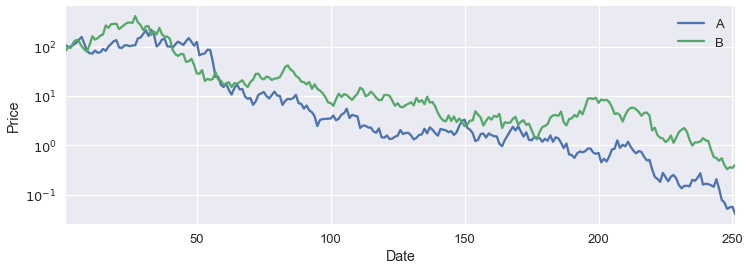

In [7]:
%matplotlib inline
import random 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import simpy
import seaborn as sns
sns.set_context('talk')

class gbm(object):
    def __init__(self, env, name, tick=1.0, P=100.0, mu=0.01, sigma=0.10):
        self.env = env
        self.name = name
        self.tick = tick
        self.t = 0
        self.P = P
        self.hist = pd.Series()
        self.mu = mu
        self.sigma = sigma
        self.proc = env.process(self.run())
        
    def plot(self):
        self.hist.plot(logy=True,label=self.name)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend(loc='best')
        
    def run(self):
        while True:
            yield env.timeout(self.tick)
            self.t += self.tick
            self.P += self.P*(self.mu*self.tick + \
                    self.sigma*random.normalvariate(0,1)*np.sqrt(self.tick))
            self.hist.set_value(self.t,self.P)
    
# create the simulation environment
env = simpy.Environment()

# add the clock process to the environment. Set the tick interval.
a = gbm(env, "A", tick=1.0, mu=0.01, sigma=0.2)
b = gbm(env, "B", tick=1.0, mu=0.01, sigma=0.2)

# run the simulation for a fixed period of time
env.run(until=252.0)

plt.figure(figsize=(12,4))
a.plot()
b.plot()

## Multiple Roombas

Setting up a class provides a means of modeling more complex behaviors. Here we'll consider a Roomba cleaning robot that can be either in a running mode or a charging mode.

In [8]:

class Roomba(object):
    def __init__(self,env,name,charge_duration,clean_duration):
        self.env = env
        self.name = name
        self.charge_duration = charge_duration
        self.clean_duration = clean_duration
        self.proc = env.process(self.run())

    def run(self):
        while True:
            yield env.process(self.charge())
            yield env.process(self.clean())
    
    def clean(self):
        print("{:<3s} start charging at {:4.1f}".format(self.name,env.now))
        yield env.timeout(self.clean_duration)
    
    def charge(self):
        print("{:<3s} start cleaning at {:4.1f}".format(self.name,env.now))
        yield env.timeout(self.charge_duration)

import simpy
env = simpy.Environment()

A = Roomba(env,'A',1.1,2.3)
B = Roomba(env,'B',0.9,3.1)

# start processes
env.run(until=6)

A   start cleaning at  0.0
B   start cleaning at  0.0
B   start charging at  0.9
A   start charging at  1.1
A   start cleaning at  3.4
B   start cleaning at  4.0
A   start charging at  4.5
B   start charging at  4.9
